# **Fraud Detection with Supervised Learning**

The primary objective of this project is to develop a fraud detection system using supervised learning techniques. The system will detect potentially fraudulent credit card transactions and serve as a foundational baseline model for future enhancements with advanced techniques like deep learning.

## **Problem Statement**
Credit card fraud is a significant issue faced by financial institutions worldwide. With the growing volume of transactions, detecting fraudulent activities in real-time is critical. Building an efficient fraud detection system can help minimise losses and protect customers from fraudulent charges. The challenge lies in identifying fraudulent transactions from vast amounts of data while maintaining low false positives and high detection rates.

## **Key Steps in the Project**

1. **Import Libraries and Data Collection**: 
   - Load the dataset containing historical credit card transactions, ensuring it is correctly imported into the environment and prepared for analysis by addressing any file format or loading issues.

2. **Data Exploration, Preprocessing, and Exploratory Data Analysis (EDA)**: 
   - Perform detailed exploratory data analysis (EDA) to investigate the distributions of various features, detect potential outliers, handle missing values, and gain insights into patterns or relationships between variables relevant to fraud detection, while also addressing the class imbalance in fraudulent and non-fraudulent transactions.

3. **Data Transformation and Feature Engineering**: 
   - Apply necessary transformations to the data, such as normalisation, encoding categorical variables, and creating new features that can enhance the model's predictive performance.

4. **Model Selection, Model Training, and Model Evaluation**: 
   - Select appropriate supervised learning algorithms, train the models using the prepared dataset, and evaluate their performance using metrics such as accuracy, precision, recall, and F1-score.

5. **Model Deployment**: 
   - Develop and deploy a web-based fraud detection system using **FastAPI**. This involves creating an API that can accept new transaction data and return predictions on whether the transaction is likely fraudulent.

### **Step 1: Import Libraries and Data Collection**

In [21]:
# -------------------------- Import Libraries --------------------------

# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

# Machine Learning libraries
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    cross_val_score,
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    roc_auc_score,
)
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import (
    VarianceThreshold,
    SelectKBest,
    chi2,
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import joblib
import os

# Set up warnings filter and seaborn style
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Optional: Adjust default figure size for plots
plt.rcParams['figure.figsize'] = [10, 6]


In [2]:

# -------------------------- Step 1: Load Dataset --------------------------

# Load the dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\Fraud-Detection-with-Supervised-Learning\creditcard.csv")

# Display the first few rows of the dataset
print("Dataset loaded successfully.")
print(df.head())

Dataset loaded successfully.
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

In [3]:
# Display general information about the dataset (data types, non-null values, etc.)
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

In [4]:
# Display basic statistics of the numerical features
print("\nDataset Statistics:")
print(df.describe())

# Display the counts of unique values in the 'Class' column
class_distribution = df['Class'].value_counts()
print("\nClass Distribution (0 = Normal, 1 = Fraud):")
print(class_distribution)


Dataset Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

### **Step 2: Data Exploration, Preprocessing and Exploratory Data Analysis (EDA)**

In [5]:
# -------------------------- Step 2: Data Exploration, Preprocessing and Exploratory Data Analysis (EDA) --------------------------

# 1. Check for missing values and print the summary
missing_values = df.isnull().sum()
print("Missing Values in Each Feature:\n", missing_values[missing_values > 0])

# 2. Print the distribution of fraudulent vs non-fraudulent transactions
class_distribution = df['Class'].value_counts(normalize=True) * 100
print("\nClass Distribution (%):")
print(f"Non-Fraudulent Transactions (0): {class_distribution[0]:.2f}%")
print(f"Fraudulent Transactions (1): {class_distribution[1]:.2f}%")

# 3. Print basic statistics of the 'Amount' feature
amount_stats = df['Amount'].describe()
print("\nStatistics for Transaction Amounts:")
print(amount_stats)

# 4. Print the overall data shape and information
print("\nData Shape:", df.shape)
print("\nData Information:")
print(df.info())

# 5. Print correlation information for selected features
corr_values = df.corr()
high_correlation = corr_values[corr_values['Class'].abs() > 0.2].index.tolist()
print("\nFeatures Highly Correlated with Class (|Correlation| > 0.2):", high_correlation)

# 6. Print outlier information for the 'Amount' feature
outliers = df[df['Amount'] > amount_stats['75%'] + 1.5 * (amount_stats['75%'] - amount_stats['25%'])]
print("\nNumber of Outliers in 'Amount' Feature:", outliers.shape[0])
print("Outlier Statistics:\n", outliers['Amount'].describe())

# 7. Print insights on transaction time distribution
print("\nUnique Transaction Times:", df['Time'].nunique())
print("Range of Transaction Times: Min =", df['Time'].min(), "Max =", df['Time'].max())

# 8. Additional insights on the data
print("\nData Types:\n", df.dtypes)
print("\nNumber of Unique Values per Feature:\n", df.nunique())


Missing Values in Each Feature:
 Series([], dtype: int64)

Class Distribution (%):
Non-Fraudulent Transactions (0): 99.83%
Fraudulent Transactions (1): 0.17%

Statistics for Transaction Amounts:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Data Shape: (284807, 31)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      28480

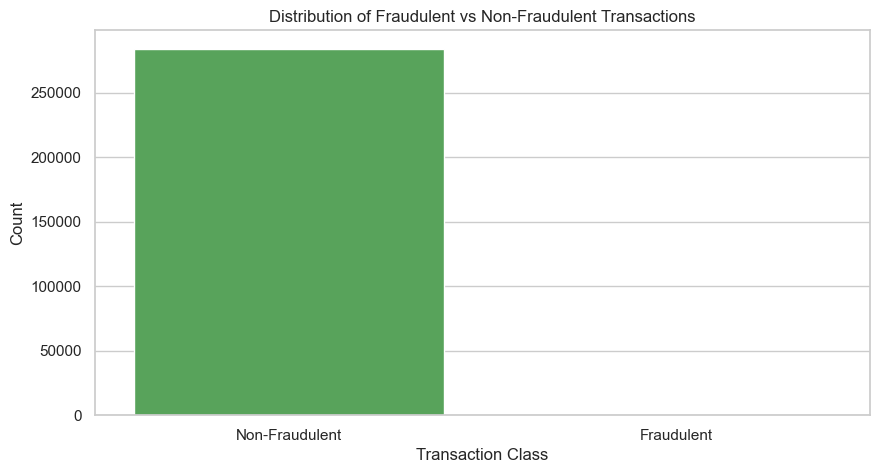

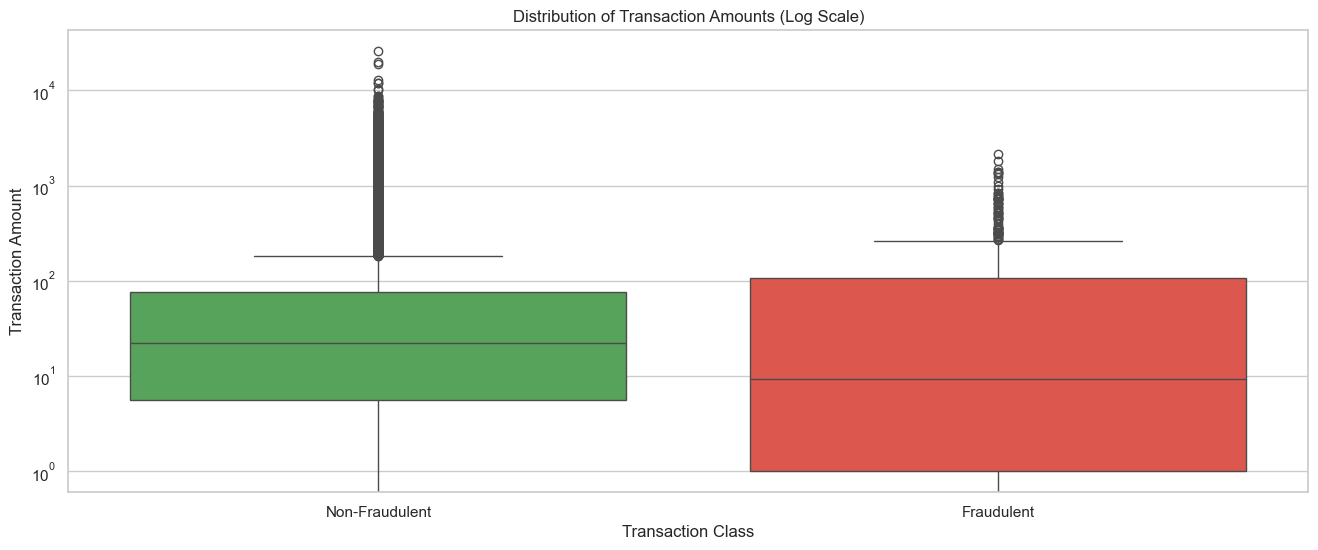

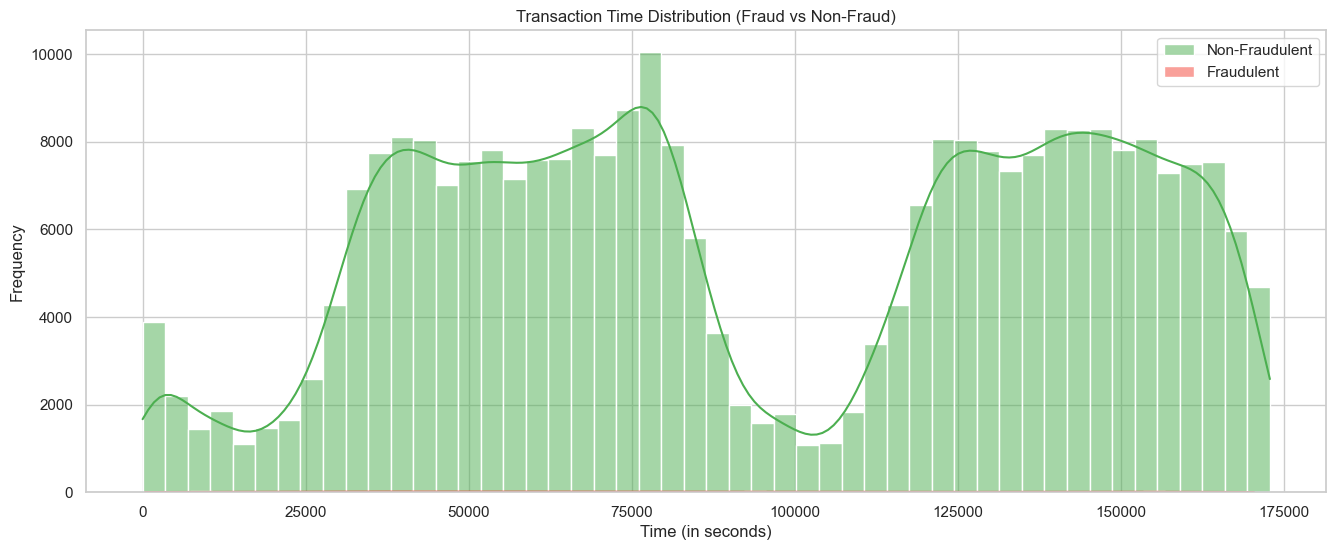

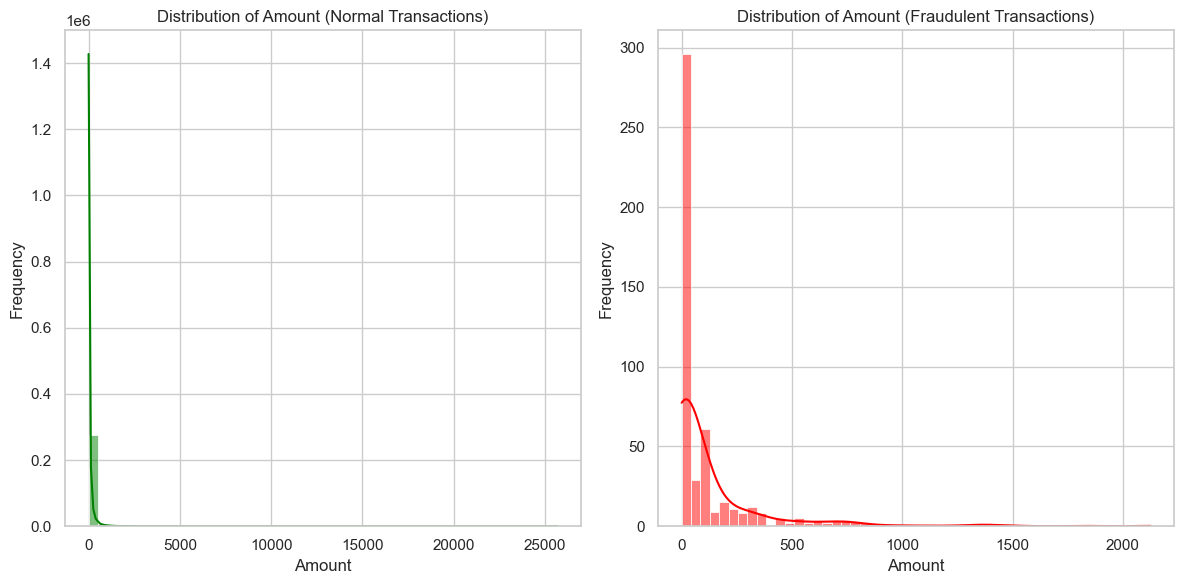


Data Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nul

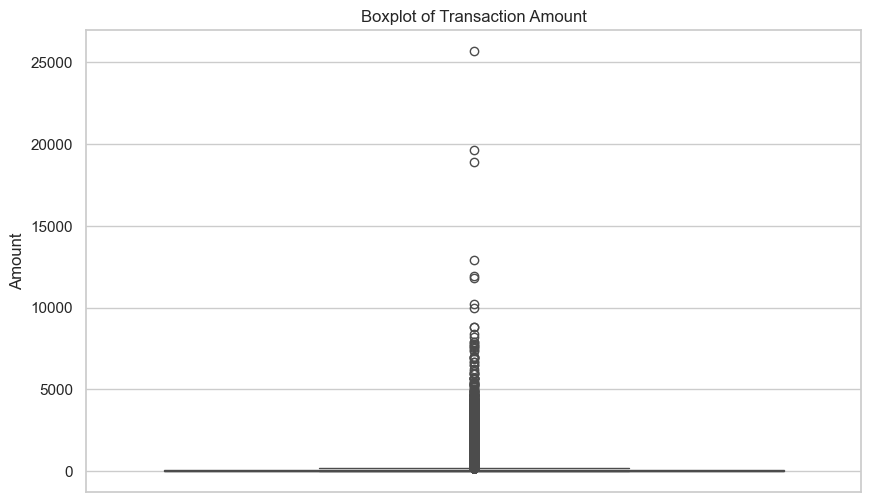

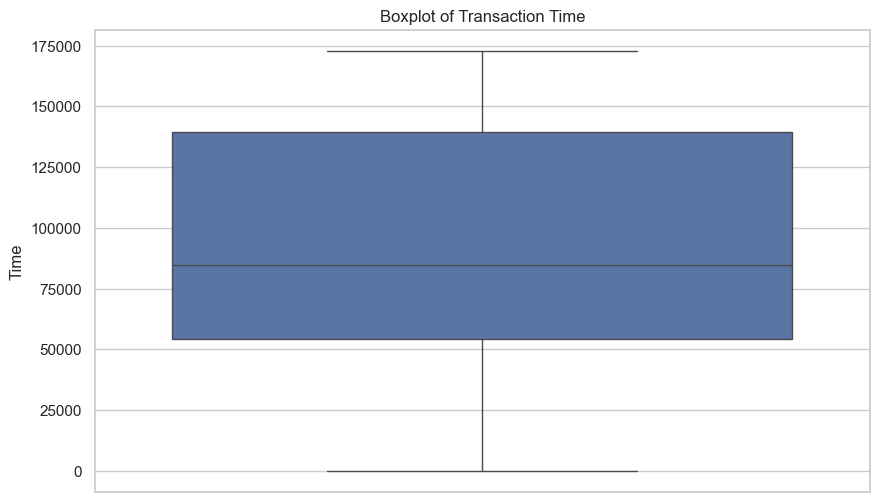

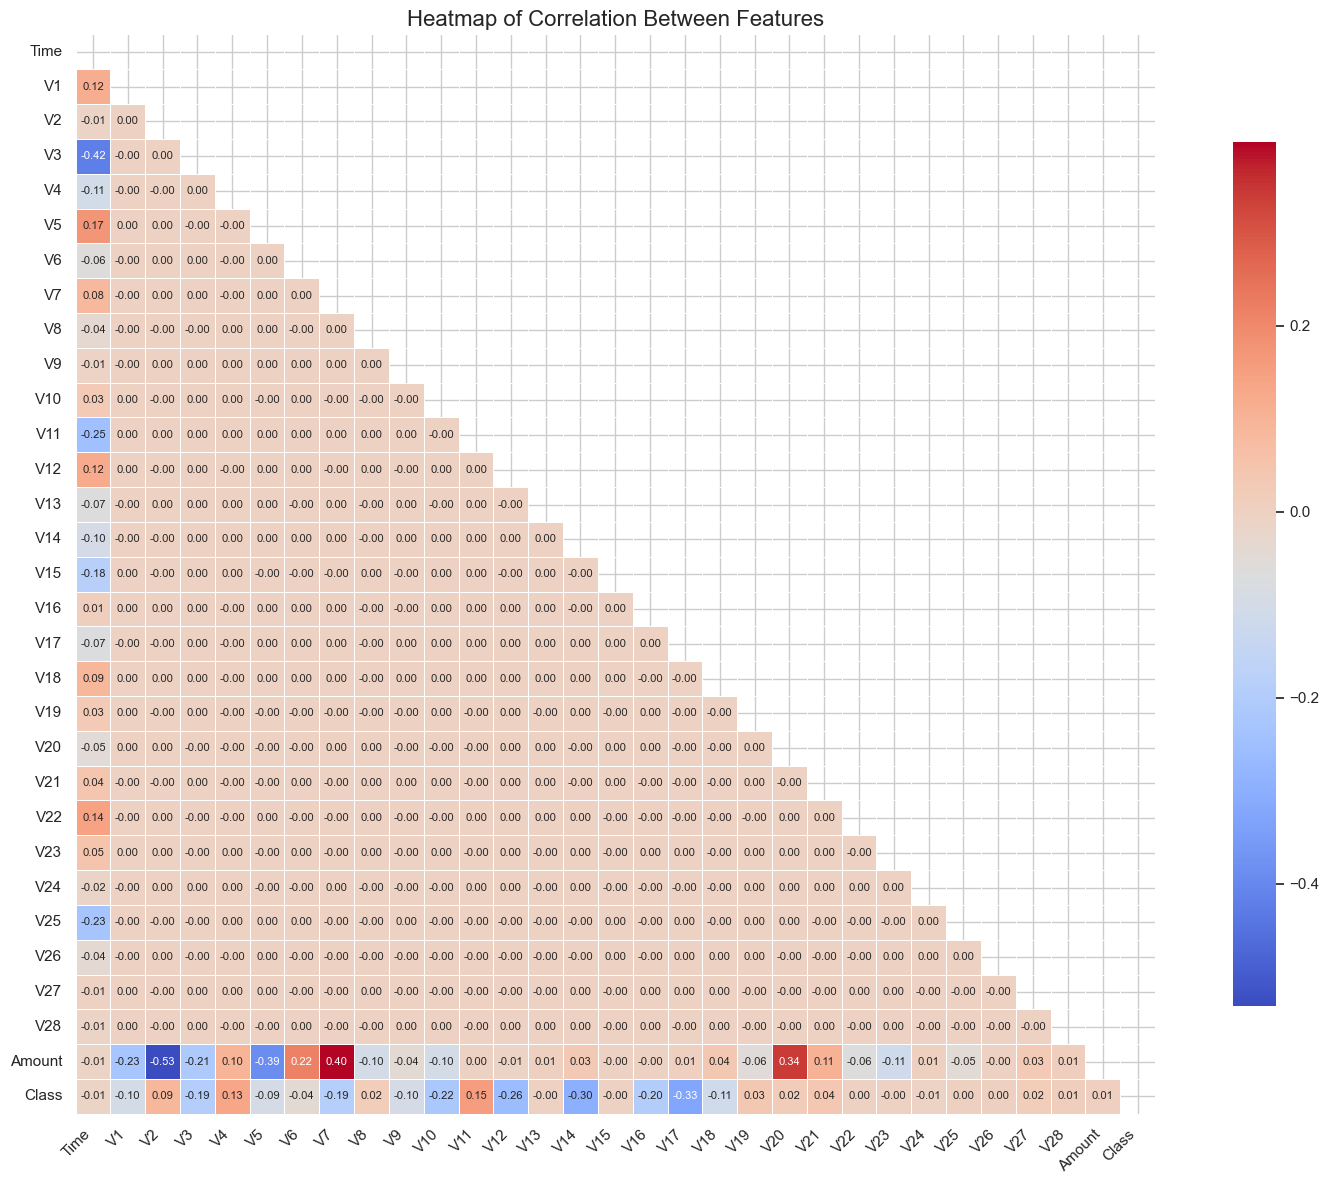


Features Highly Correlated with 'Class' (|Correlation| > 0.2): ['V10', 'V12', 'V14', 'V17', 'Class']


In [6]:
# 1. Distribution of fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 5))  # Set figure size
sns.countplot(x='Class', data=df, palette=['#4CAF50', '#F44336'])  # Plot countplot for Class column
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')  # Set plot title
plt.xlabel('Transaction Class')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])  # Set x-axis tick labels
plt.show()  # Display the plot

# 2. Distribution of transaction amounts for fraud vs non-fraud
plt.figure(figsize=(16, 6))  # Set figure size
sns.boxplot(x='Class', y='Amount', data=df, palette=['#4CAF50', '#F44336'])
plt.yscale('log')  # Log scale to handle skewness
plt.title('Distribution of Transaction Amounts (Log Scale)')  # Set plot title
plt.xlabel('Transaction Class')  # Set x-axis label
plt.ylabel('Transaction Amount')  # Set y-axis label
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])  # Set x-tick labels
plt.show()  # Display the plot

# 3. Time distribution of fraud vs non-fraud transactions
plt.figure(figsize=(16, 6))  # Set figure size
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color='#4CAF50', label='Non-Fraudulent', kde=True)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color='#F44336', label='Fraudulent', kde=True)
plt.title('Transaction Time Distribution (Fraud vs Non-Fraud)')  # Set plot title
plt.xlabel('Time (in seconds)')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.legend()  # Display legend
plt.show()  # Render the plot

# 4. Visualize the 'Amount' distribution for normal and fraudulent transactions
plt.figure(figsize=(12, 6))

# Subplot for normal transactions
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='green', kde=True)
plt.title('Distribution of Amount (Normal Transactions)')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Subplot for fraudulent transactions
plt.subplot(1, 2, 2)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', kde=True)
plt.title('Distribution of Amount (Fraudulent Transactions)')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 5. Print overall data shape and information
print("\nData Shape:", df.shape)
print("Data Info:\n", df.info())

# Handle missing values (if any)
print("\nMissing values:\n", df.isnull().sum())

# Detect potential outliers using the 'Amount' and 'Time' columns
sns.boxplot(df['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

sns.boxplot(df['Time'])
plt.title('Boxplot of Transaction Time')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(16, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, square=True, 
            linewidths=.5, annot_kws={"size": 8}, cbar_kws={"shrink": .8})
plt.title('Heatmap of Correlation Between Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Extract highly correlated features with 'Class' (|Correlation| > 0.2)
correlated_features = corr['Class'][corr['Class'].abs() > 0.2].index.tolist()
print("\nFeatures Highly Correlated with 'Class' (|Correlation| > 0.2):", correlated_features)


In [7]:
# Data Preprocessing

# 1. Handle Missing Values
# Option 1: Drop rows with missing values
# df.dropna(inplace=True)

# Option 2: Fill missing values
df.fillna(df.mean(), inplace=True)  # Replace with mean for numerical columns
# Note: You can also handle missing values for categorical variables separately

# 2. Encoding Categorical Variables
# Assuming there are categorical columns, for example, 'CategoryColumn'
# If you have a categorical column, use one-hot encoding
if 'CategoryColumn' in df.columns:
    df = pd.get_dummies(df, columns=['CategoryColumn'], drop_first=True)

# 3. Scaling Numerical Features
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print summary of the preprocessed data
print("\nPreprocessed Data Info:")
print(df.info())


Preprocessed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null

### **Step 3: Data Transformation and Feature Engineering**

In [8]:
# -------------------------- Data Transformation and Feature Engineering --------------------------

# Assuming 'df' is your preprocessed DataFrame

# Set your target variable and features
X = df.drop(columns=['Class'])  # Drop the target variable to get features
y = df['Class']  # Target variable

# Check unique values in y
print("Unique values in target variable y:", y.unique())

# Convert continuous target into binary classification if necessary
# In this case, 'Class' is already binary (0 or 1), so we can directly use it
if y.dtype != 'int':
    threshold_value = 0  # Define your threshold for conversion
    y_binary = (y > threshold_value).astype(int)  # Convert to binary
else:
    y_binary = y.astype(int)  # Already binary

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_binary)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Final checks on the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Unique values in target variable y: [-0.04159898 24.0390519 ]
Training set shape: (398041, 30) (398041,)
Testing set shape: (170589, 30) (170589,)


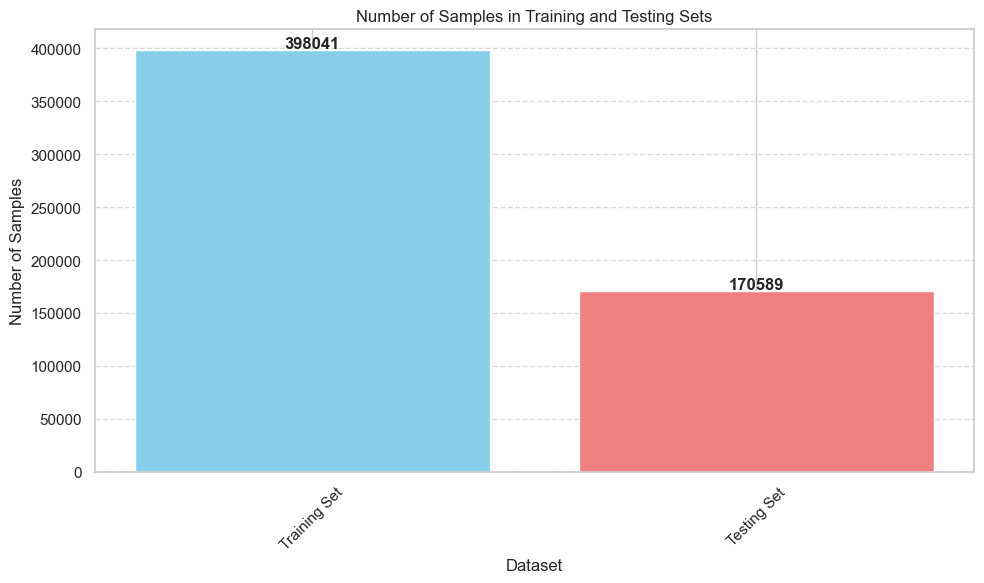

In [9]:
# -------------------------- Visualisation --------------------------
# Data
datasets = ['Training Set', 'Testing Set']
samples = [X_train.shape[0], X_test.shape[0]]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(datasets, samples, color=['skyblue', 'lightcoral'])
plt.title('Number of Samples in Training and Testing Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the value on top of the bars
for i, v in enumerate(samples):
    plt.text(i, v + 2000, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### **Step 4: Model Selection, Model Training and Model Evaluation**

In [10]:
# -------------------------- Model Selection --------------------------

# Define candidate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

# DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Training each model and evaluating
for name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results to the DataFrame
    results = pd.concat([results, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 
                                                'Precision': [precision], 'Recall': [recall], 
                                                'F1 Score': [f1]})], ignore_index=True)

# Display the results
print(results)

# Optionally: Display confusion matrix for the best performing model
best_model_name = results.loc[results['F1 Score'].idxmax(), 'Model']
best_model = models[best_model_name]
y_best_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_best_pred)
print(f"Confusion Matrix for {best_model_name}:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_best_pred))


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.948631   0.974023  0.921847  0.947217
1        Random Forest  0.999889   0.999777  1.000000  0.999889
2    Gradient Boosting  0.978170   0.986346  0.969763  0.977985
Confusion Matrix for Random Forest:
 [[85276    19]
 [    0 85294]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



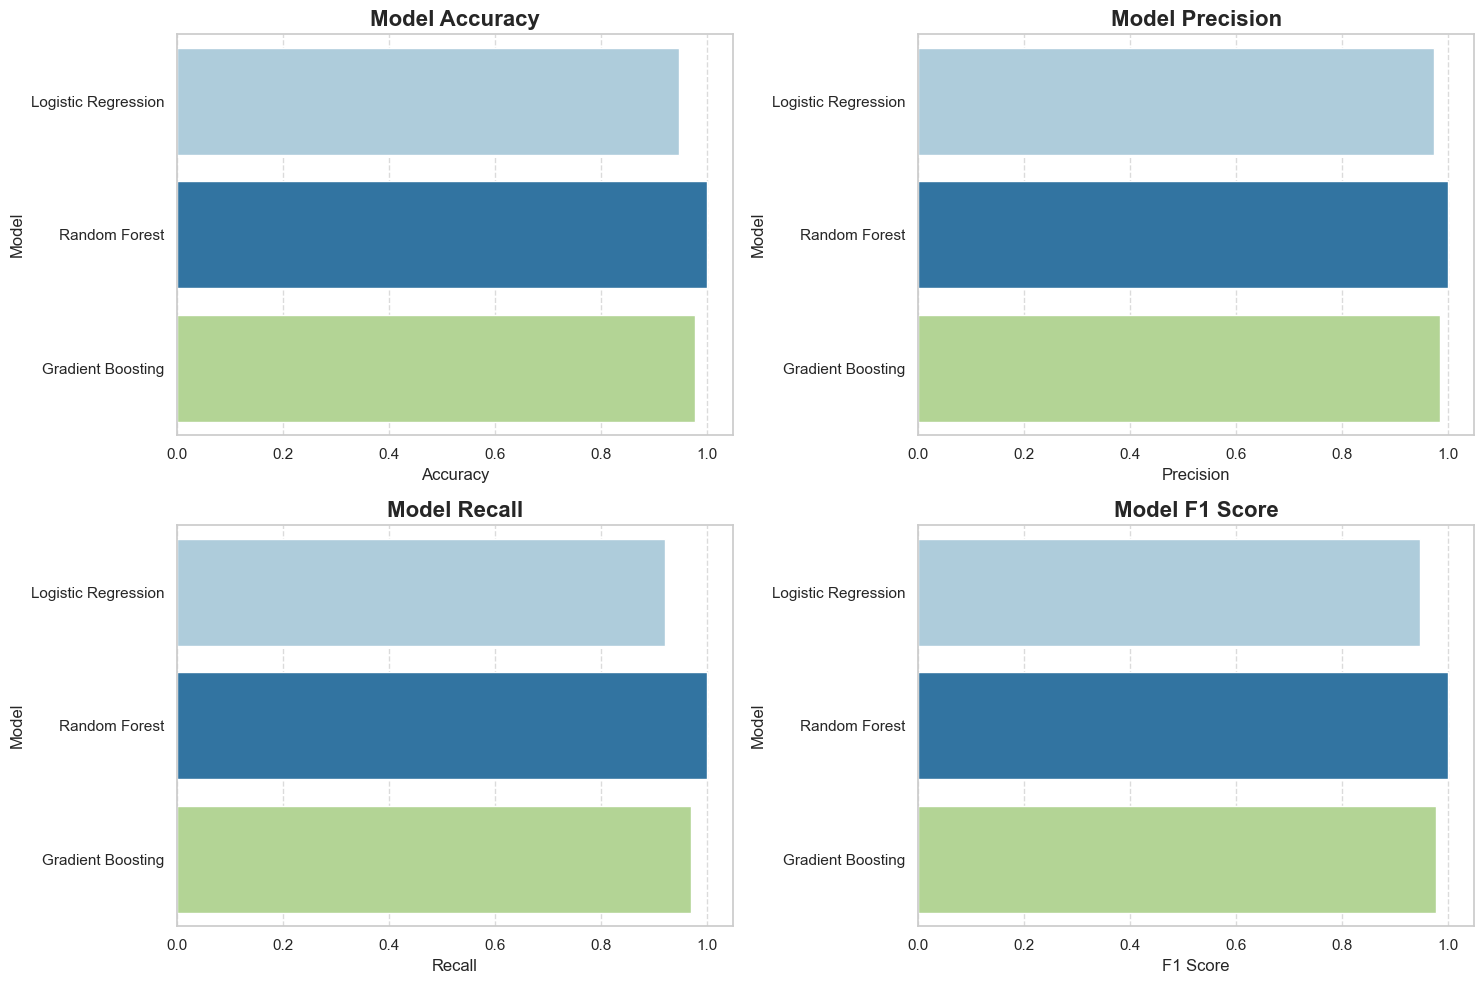

In [15]:
# -------------------------- Visualise Results --------------------------

# Set the style of seaborn for a more professional look
sns.set(style="whitegrid", palette="muted")

# Create a color palette
colors = sns.color_palette("Paired")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Model Accuracy
sns.barplot(x='Accuracy', y='Model', data=results, ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('Model Accuracy', fontsize=16, weight='bold')
axes[0, 0].set_xlabel('Accuracy', fontsize=12)
axes[0, 0].set_ylabel('Model', fontsize=12)

# Model Precision
sns.barplot(x='Precision', y='Model', data=results, ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('Model Precision', fontsize=16, weight='bold')
axes[0, 1].set_xlabel('Precision', fontsize=12)
axes[0, 1].set_ylabel('Model', fontsize=12)

# Model Recall
sns.barplot(x='Recall', y='Model', data=results, ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('Model Recall', fontsize=16, weight='bold')
axes[1, 0].set_xlabel('Recall', fontsize=12)
axes[1, 0].set_ylabel('Model', fontsize=12)

# Model F1 Score
sns.barplot(x='F1 Score', y='Model', data=results, ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('Model F1 Score', fontsize=16, weight='bold')
axes[1, 1].set_xlabel('F1 Score', fontsize=12)
axes[1, 1].set_ylabel('Model', fontsize=12)

# Adding grid lines for better readability
for ax in axes.flat:
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

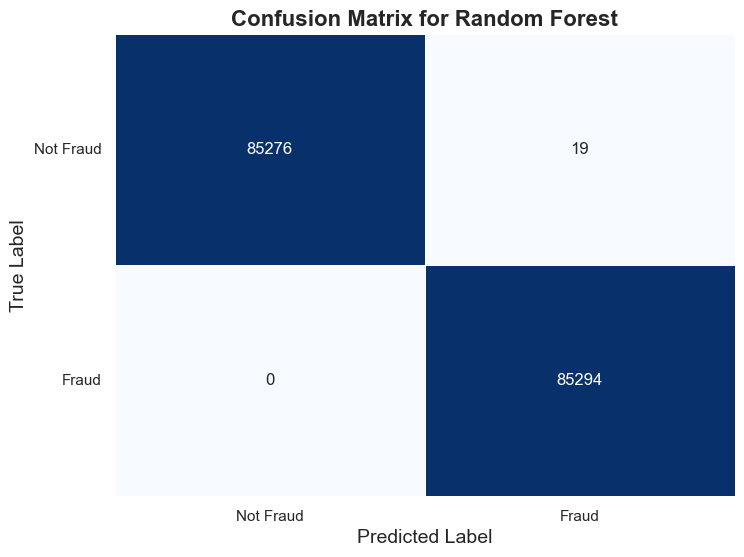

In [16]:
# -------------------------- Confusion Matrix Visualisation --------------------------
# Plot the confusion matrix for the best performing model (Random Forest in this case)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'], linewidths=.5)

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title(f'Confusion Matrix for {best_model_name}', fontsize=16, weight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

### **Step 5: Model Deployment**

In [22]:
# Create the 'model' directory if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

# Save the trained model
joblib.dump(best_model, 'model/fraud_model.pkl')

['model/fraud_model.pkl']

In [24]:
# Load the trained model
loaded_model = joblib.load('model/fraud_model.pkl')